## Part 1: The Doomsday Algorithm

The Doomsday algorithm, devised by mathematician J. H. Conway, computes the day of the week any given date fell on. The algorithm is designed to be simple enough to memorize and use for mental calculation.

__Example.__ With the algorithm, we can compute that July 4, 1776 (the day the United States declared independence from Great Britain) was a Thursday.

The algorithm is based on the fact that for any year, several dates always fall on the same day of the week, called the <em style="color:#F00">doomsday</em> for the year. These dates include 4/4, 6/6, 8/8, 10/10, and 12/12.

__Example.__ The doomsday for 2016 is Monday, so in 2016 the dates above all fell on Mondays. The doomsday for 2017 is Tuesday, so in 2017 the dates above will all fall on Tuesdays.

The doomsday algorithm has three major steps:

1. Compute the anchor day for the target century.
2. Compute the doomsday for the target year based on the anchor day.
3. Determine the day of week for the target date by counting the number of days to the nearest doomsday.

Each step is explained in detail below.

### The Anchor Day

The doomsday for the first year in a century is called the <em style="color:#F00">anchor day</em> for that century. The anchor day is needed to compute the doomsday for any other year in that century. The anchor day for a century $c$ can be computed with the formula:
$$
a = \bigl( 5 (c \bmod 4) + 2 \bigr) \bmod 7
$$
The result $a$ corresponds to a day of the week, starting with $0$ for Sunday and ending with $6$ for Saturday.

__Note.__ The modulo operation $(x \bmod y)$ finds the remainder after dividing $x$ by $y$. For instance, $12 \bmod 3 = 0$ since the remainder after dividing $12$ by $3$ is $0$. Similarly, $11 \bmod 7 = 4$, since the remainder after dividing $11$ by $7$ is $4$.

__Example.__ Suppose the target year is 1954, so the century is $c = 19$. Plugging this into the formula gives
$$a = \bigl( 5 (19 \bmod 4) + 2 \bigr) \bmod 7 = \bigl( 5(3) + 2 \bigr) \bmod 7 = 3.$$
In other words, the anchor day for 1900-1999 is Wednesday, which is also the doomsday for 1900.

__Exercise 1.1.__ Write a function that accepts a year as input and computes the anchor day for that year's century. The modulo operator `%` and functions in the `math` module may be useful. Document your function with a docstring and test your function for a few different years.  Do this in a new cell below this one.

In [2]:
# Defines a function to compute the anchor day for that year's century.
def get_anchor(year):
    anchor = (5*(year % 4) + 2) % 7
    yield(anchor)
years = xrange(15,22) #Loop through some years and check anchor dates. 
for y in years:
    print("The anchor day for year " + str(y) + " is: " + str(get_anchor(y).next()))

The anchor day for year 15 is: 3
The anchor day for year 16 is: 2
The anchor day for year 17 is: 0
The anchor day for year 18 is: 5
The anchor day for year 19 is: 3
The anchor day for year 20 is: 2
The anchor day for year 21 is: 0


### The Doomsday

Once the anchor day is known, let $y$ be the last two digits of the target year. Then the doomsday for the target year can be computed with the formula:
$$d = \left(y + \left\lfloor\frac{y}{4}\right\rfloor + a\right) \bmod 7$$
The result $d$ corresponds to a day of the week.

__Note.__ The floor operation $\lfloor x \rfloor$ rounds $x$ down to the nearest integer. For instance, $\lfloor 3.1 \rfloor = 3$ and $\lfloor 3.8 \rfloor = 3$.

__Example.__ Again suppose the target year is 1954. Then the anchor day is $a = 3$, and $y = 54$, so the formula gives
$$
d = \left(54 + \left\lfloor\frac{54}{4}\right\rfloor + 3\right) \bmod 7 = (54 + 13 + 3) \bmod 7 = 0.
$$
Thus the doomsday for 1954 is Sunday.

__Exercise 1.2.__ Write a function that accepts a year as input and computes the doomsday for that year. Your function may need to call the function you wrote in exercise 1.1. Make sure to document and test your function.

In [3]:
#Import floor function from math library
import math
from __future__ import division
#Function that accepts a year as input and computes the doomsday for that year. 
def get_doomsday(year):
    year = str(year)
    a = int(year[:2])
    y = int(year[-2:])
    doomsday = (y + math.floor(y/4) + get_anchor(a).next()) % 7 
    yield(doomsday)
get_doomsday(2017).next()

2.0

### The Day of Week

The final step in the Doomsday algorithm is to count the number of days between the target date and a nearby doomsday, modulo 7. This gives the day of the week.

Every month has at least one doomsday:
* (regular years) 1/10, 2/28
* (leap years) 1/11, 2/29
* 3/21, 4/4, 5/9, 6/6, 7/11, 8/8, 9/5, 10/10, 11/7, 12/12

__Example.__ Suppose we want to find the day of the week for 7/21/1954. The doomsday for 1954 is Sunday, and a nearby doomsday is 7/11. There are 10 days in July between 7/11 and 7/21. Since $10 \bmod 7 = 3$, the date 7/21/1954 falls 3 days after a Sunday, on a Wednesday.

__Exercise 1.3.__ Write a function to determine the day of the week for a given day, month, and year. Be careful of leap years! Your function should return a string such as "Thursday" rather than a number. As usual, document and test your code.

In [14]:
#Function to identify leap years
def if_leap_year(year):
    checkLeap = (year % 400==0) | ((year % 4 == 0) & (year % 100 != 0))
    return(checkLeap)
#Function to determine the day of the week for a given day, month, and year. 
def find_day(day, month, year):
    #List out all the days in the week as string
    daysString = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
    #Check if user supplied year is a leap year
    checkLeap = if_leap_year(year)
    #If leap year use these days
    if(checkLeap == True):
        doomsdate = [11,29,21,4,9,6,11,8,5,10,7,12]
    #Else use these ones
    else:
        doomsdate = [10,28,21,4,9,6,11,8,5,10,7,12]
    #Difference between the current day and closest doomsday mod 7
    d = (int(get_doomsday(year).next()) + day - doomsdate[month-1]) % 7
    return(daysString[d])    
find_day(5,4,2017)


'Wednesday'

__Exercise 1.4.__ How many times did Friday the 13th occur in the years 1900-1999? Does this number seem to be similar to other centuries?

In [58]:
years = range(1900,2000)
def getFridays(years):
    fridayCounter = 0
    for y in years:
        for m in range(1,13):
          #Count the number of friday 13s up to the current month. 
          if (m == 1) & (y == 2017):
            break
          if find_day(13,m,y) == "Friday":
            fridayCounter = fridayCounter + 1 
    return(fridayCounter)
#There are 171 friday the 13s between 1900-1999, other centuries are around 170.
getFridays(years)

172

__Exercise 1.5.__ How many times did Friday the 13th occur between the year 2000 and today?

In [59]:
years = range(2000,2018)
getFridays(years)

29

## Part 2: 1978 Birthdays

__Exercise 2.1.__ The file `birthdays.txt` contains the number of births in the United States for each day in 1978. Inspect the file to determine the format. Note that columns are separated by the tab character, which can be entered in Python as `\t`. Write a function that uses iterators and list comprehensions with the string methods `split()` and `strip()` to  convert each line of data to the list format

```Python
[month, day, year, count]
```
The elements of this list should be integers, not strings. The function `read_birthdays` provided below will help you load the file.

In [13]:
def read_birthdays(file_path):
    """Read the contents of the birthdays file into a string.
    
    Arguments:
        file_path (string): The path to the birthdays file.
        
    Returns:
        string: The contents of the birthdays file.
    """
    with open(file_path) as file:
        return file.read()
import os 
#Read in birthday file
content = read_birthdays("birthdays.txt")
#Remove leading and trailing whitespace if any
contentMat = content.strip()
contentMat = content.split("\n")
#Remove the first 6 lines. 
contentMat = contentMat[6:]
#Remove weird leftover '\t'
contentMat = filter(lambda a: a != '\t', contentMat)
contentMat = filter(lambda a: a != '', contentMat)
def myfunction(line):
    line = line.split("\t")
    date = [int(value) for value in line[0].split("/")]
    month = date[0]
    day = date[1]
    year = date[2]
    count = int(line[1])
    return([month, day, year, count])
contentMat = [myfunction(line) for line in contentMat]
contentMat

[[1, 1, 78, 7701],
 [1, 2, 78, 7527],
 [1, 3, 78, 8825],
 [1, 4, 78, 8859],
 [1, 5, 78, 9043],
 [1, 6, 78, 9208],
 [1, 7, 78, 8084],
 [1, 8, 78, 7611],
 [1, 9, 78, 9172],
 [1, 10, 78, 9089],
 [1, 11, 78, 9210],
 [1, 12, 78, 9259],
 [1, 13, 78, 9138],
 [1, 14, 78, 8299],
 [1, 15, 78, 7771],
 [1, 16, 78, 9458],
 [1, 17, 78, 9339],
 [1, 18, 78, 9120],
 [1, 19, 78, 9226],
 [1, 20, 78, 9305],
 [1, 21, 78, 7954],
 [1, 22, 78, 7560],
 [1, 23, 78, 9252],
 [1, 24, 78, 9416],
 [1, 25, 78, 9090],
 [1, 26, 78, 9387],
 [1, 27, 78, 8983],
 [1, 28, 78, 7946],
 [1, 29, 78, 7527],
 [1, 30, 78, 9184],
 [1, 31, 78, 9152],
 [2, 1, 78, 9159],
 [2, 2, 78, 9218],
 [2, 3, 78, 9167],
 [2, 4, 78, 8065],
 [2, 5, 78, 7804],
 [2, 6, 78, 9225],
 [2, 7, 78, 9328],
 [2, 8, 78, 9139],
 [2, 9, 78, 9247],
 [2, 10, 78, 9527],
 [2, 11, 78, 8144],
 [2, 12, 78, 7950],
 [2, 13, 78, 8966],
 [2, 14, 78, 9859],
 [2, 15, 78, 9285],
 [2, 16, 78, 9103],
 [2, 17, 78, 9238],
 [2, 18, 78, 8167],
 [2, 19, 78, 7695],
 [2, 20, 78, 9021]

__Exercise 2.2.__ Which month had the most births in 1978? Which day of the week had the most births? Which day of the week had the fewest? What conclusions can you draw? You may find the `Counter` class in the `collections` module useful.

In [14]:
month_counts = [line[0] for line in contentMat]
#Month with most births.
month_births = []
for m in range(1,13):
    indices = [i for i, x in enumerate(month_counts) if x == m]
    total = sum([row[3] for row in contentMat[min(indices):max(indices)+1]])
    month_births.append([m,total])
#August has the most births.
day_counts = [find_day(date[1],date[0],1978) for date in contentMat]
daysOfWeek = list(set([line for line in day_counts]))
day_births = []
for d in daysOfWeek:
    indices = [i for i, x in enumerate(day_counts) if x == d]
    total = sum([row[3] for row in contentMat[min(indices):max(indices)+1]])
    day_births.append([d,total])
#Sunday has most births, Monday had the fewest. 
#People prefer having kids on weekends? 

__Exercise 2.3.__ What would be an effective way to present the information in exercise 2.2? You don't need to write any code for this exercise, just discuss what you would do.

The most effective way to present the information in exercise 2.2 would probably be a barplot with days or months as the X axis and the total count on the Y axis to quickly spot the day or month with the most or least births. 

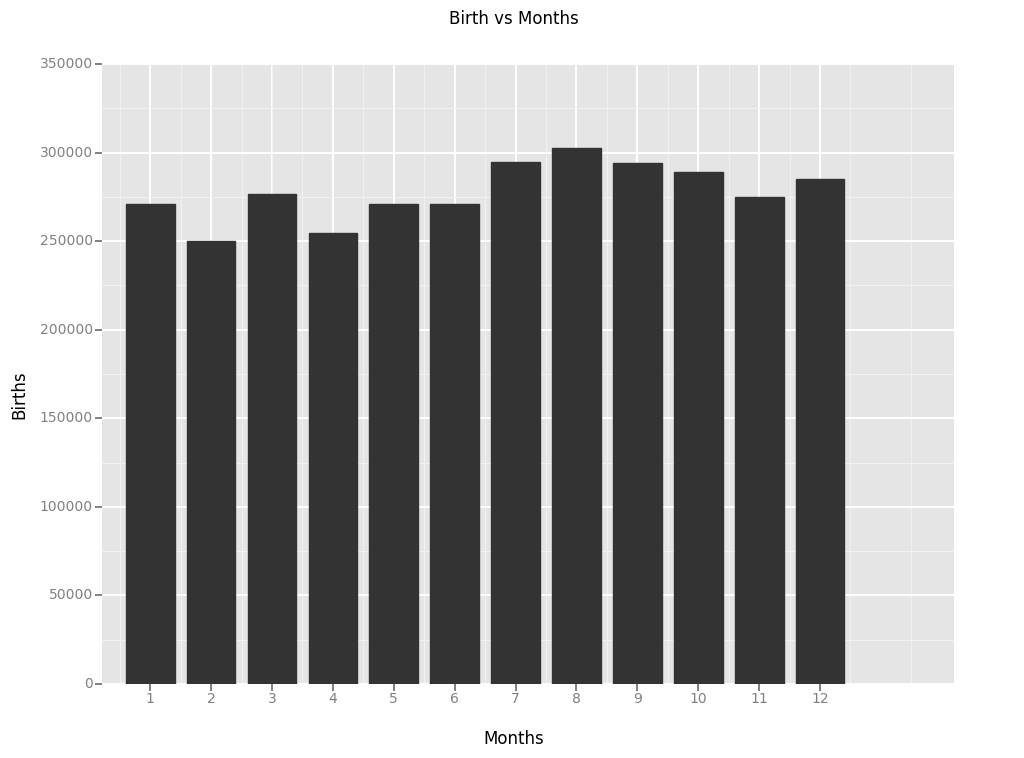

<ggplot: (8753624742237)>

In [22]:
from ggplot import *
import pandas as pd
df = pd.DataFrame({"x":range(1,13), "y":[line[1] for line in month_births]})
ggplot(aes(x="x", weight="y"), df) + geom_bar() + xlab("Months") + ylab("Births") + ggtitle("Birth vs Months")

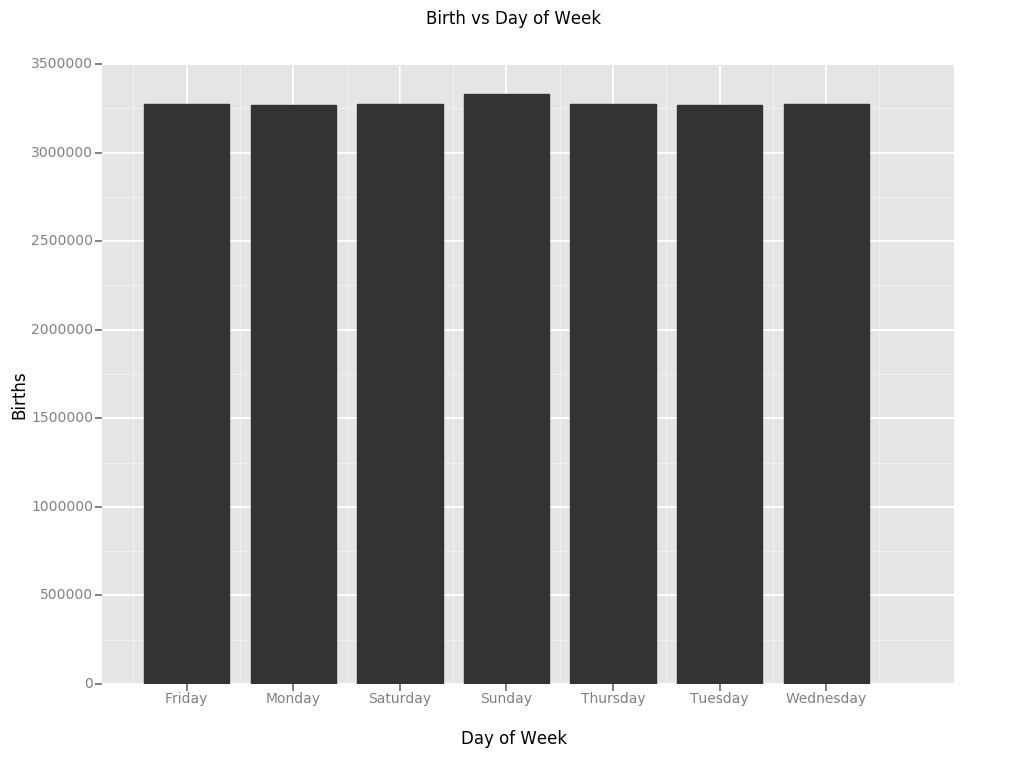

<ggplot: (8753624315689)>

In [25]:
df = pd.DataFrame({"x":[line[0] for line in day_births], "y":[line[1] for line in day_births]})
ggplot(aes(x="x", weight="y"), df) + geom_bar() + xlab("Day of Week") + ylab("Births") + ggtitle("Birth vs Day of Week")